In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(r"/content/StudentsPerformance.csv")

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.isnull().sum()

,0
gender,1
race/ethnicity,1
parental level of education,4
lunch,2
test preparation course,4
math score,3
reading score,5
writing score,2


In [ ]:
df['gender'] = df['gender'].map({'female' : 1, 'male' : 0})

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1.0,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,1.0,group C,some college,standard,completed,69.0,90.0,88.0
2,1.0,group B,master's degree,standard,none,90.0,95.0,93.0
3,0.0,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,0.0,group C,some college,standard,none,76.0,NaN,75.0


In [ ]:
df['gender'].fillna(df['gender'].mean(), inplace = True)

<ipython-input-12-f2deae762139>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].fillna(df['gender'].mean(), inplace = True)


In [ ]:
df['gender'].isnull()

,gender
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


In [ ]:
df['math score'].isnull().sum()

np.int64(3)

In [ ]:
df['math score'].fillna(df['math score'].median(), inplace= True )

<ipython-input-18-bc3431e7197c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['math score'].fillna(df['math score'].median(), inplace= True )


In [ ]:
df.isnull().sum()

,0
gender,0
race/ethnicity,1
parental level of education,4
lunch,2
test preparation course,4
math score,0
reading score,5
writing score,2


In [ ]:
df['reading score'].fillna(df['reading score'].median(), inplace= True )

<ipython-input-20-80e33ac2cc8b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reading score'].fillna(df['reading score'].median(), inplace= True )


In [ ]:
df['writing score'].fillna(df['writing score'].median(), inplace= True )

<ipython-input-21-241ff5744d62>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['writing score'].fillna(df['writing score'].median(), inplace= True )


In [ ]:
df = df.drop(['race/ethnicity', 'parental level of education','lunch', 'test preparation course'], axis=1)


In [ ]:
for i in df.columns:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
  df= df[(df[i] >= lower_bound ) & (df[i] <= upper_bound )]
  print("\ After handling outliers of ", i)
  print(df)


\ After handling outliers of  gender
     gender  math score  reading score  writing score
0       1.0        72.0           72.0           74.0
1       1.0        69.0           90.0           88.0
2       1.0        90.0           95.0           93.0
3       0.0        47.0           57.0           44.0
4       0.0        76.0           70.0           75.0
..      ...         ...            ...            ...
995     1.0        88.0           99.0           95.0
996     0.0        62.0           55.0           55.0
997     1.0        59.0           71.0           65.0
998     1.0        68.0           78.0           77.0
999     1.0        77.0           86.0           86.0

[1000 rows x 4 columns]
\ After handling outliers of  math score
     gender  math score  reading score  writing score
0       1.0        72.0           72.0           74.0
1       1.0        69.0           90.0           88.0
2       1.0        90.0           95.0           93.0
3       0.0        47.0          

In [ ]:
df['gender'].skew()

np.float64(-0.06521514925185512)

<Axes: xlabel='gender', ylabel='Count'>

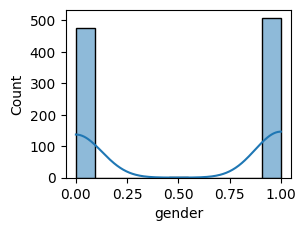

In [ ]:
plt.subplot(2,2,1)
sns.histplot(df['gender'], kde= True)

In [ ]:
df['gender_log'] = np.log(df['gender'])

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
df['gender_log'].skew()

/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


np.float64(nan)

<Axes: xlabel='gender', ylabel='Count'>

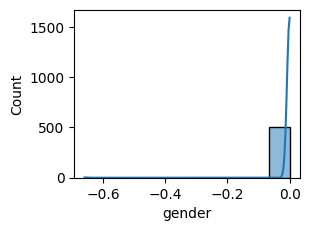

In [ ]:
plt.subplot(2,2,1)
sns.histplot(df['gender'], kde= True)
